In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

import sys
sys.path.append("../")
from create_spec import create_spec
from fit2gauss import fit2gauss

In [2]:
# import arrays
s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f4_t10_h20.txt', dtype=int)
e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f4_t10_h20_err.txt', dtype=int)

s1 = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f4_t10_h20_tri.txt', dtype=int)
e1 = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f4_t10_h20_tri_err.txt', dtype=int)

In [3]:
# wavelengths
line = 1403.
ll = np.arange(line-10,line+10,0.01)

In [4]:
N = s.shape[0] # len of array (in steps of 2s)
N = 18

In [5]:
v_r = np.zeros(N)
v_b = np.zeros(N)
w_r = np.zeros(N)
w_b = np.zeros(N)

v_r2 = np.zeros(N)
v_b2 = np.zeros(N)
w_r2 = np.zeros(N)
w_b2 = np.zeros(N)

for i in range(0,N):
    
    wav = ll
    
    spec = s[i,:]
    spec2 = s1[i,:]
    
    error = e[i,:]
    error2 = e1[i,:]

    res = fit2gauss(wav,spec,error)
    res2 = fit2gauss(wav,spec2,error2)
    a2g = res["a2g"] # extract fit parameters
    a2g2 = res2["a2g"]

    #calculate Doppler velocities and wavelengths
    line = 1403.
    c = 300.
    freq = c/line*1e3

    if a2g[1] < a2g[4]:
        v_b[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_r[i] = (a2g[4]-line)/line*3e5

        w_b[i] = a2g[2]*freq
        w_r[i] = a2g[5]*freq

    else:
        v_r[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_b[i] = (a2g[4]-line)/line*3e5

        w_r[i] = a2g[2]*freq
        w_b[i] = a2g[5]*freq

        
    if a2g2[1] < a2g2[4]:
        v_b2[i] = (a2g2[1]-line)/line*3e5 # in km/s
        v_r2[i] = (a2g2[4]-line)/line*3e5

        w_b2[i] = a2g2[2]*freq
        w_r2[i] = a2g2[5]*freq

    else:
        v_r2[i] = (a2g2[1]-line)/line*3e5 # in km/s
        v_b2[i] = (a2g2[4]-line)/line*3e5

        w_r2[i] = a2g2[2]*freq
        w_b2[i] = a2g2[5]*freq

../fit2gauss.py:98: RuntimeWarning: divide by zero encountered in true_divide
  X2one = np.sum(((y_modelone - y) / yerr)**2)
../fit2gauss.py:98: RuntimeWarning: invalid value encountered in true_divide
  X2one = np.sum(((y_modelone - y) / yerr)**2)
../fit2gauss.py:164: RuntimeWarning: divide by zero encountered in true_divide
  X2two = np.sum(((y_modeltwo - y) / yerr)**2)
../fit2gauss.py:164: RuntimeWarning: invalid value encountered in true_divide
  X2two = np.sum(((y_modeltwo - y) / yerr)**2)


In [6]:
#time = np.arange(0,50,2)
time = np.arange(0,35,2)

(0, 140)

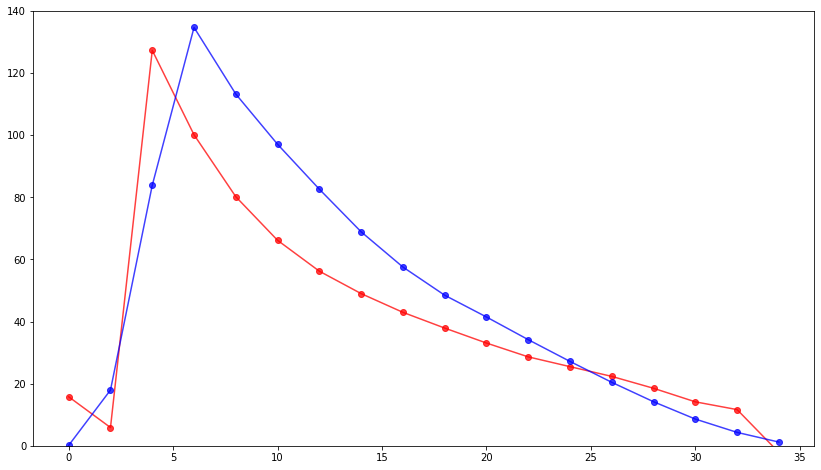

In [7]:
plt.figure(figsize=(14,8))
plt.plot(time,v_r,'r',alpha=0.75,marker='o')
plt.plot(time,v_r2,'b',alpha=0.75,marker='o')
plt.ylim(0,140)

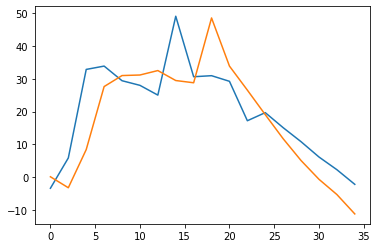

In [8]:
plt.plot(time,v_b)
plt.plot(time,v_b2)

In [21]:
jj = np.where(v_r==np.max(v_r))
jj=jj[0][0]
red = v_r[jj:]
t = np.arange(0,2*len(red),2)

ii = np.where(v_r2==np.max(v_r2))
ii=ii[0][0]
red2 = v_r2[ii:]
t2 = np.arange(0,2*len(red2),2)

jj,ii

(2, 3)

In [22]:
def fit_func(x,*a):
    ret=a[0]*np.exp(-(x*a[1])**a[2])
    return ret

a0 = [np.max(red),1/20,1]

In [24]:
p,p_cov = curve_fit(fit_func, t, red, p0=a0)
p2,p_cov2 = curve_fit(fit_func, t2, red2, p0=a0)

tau =  10.604273614231452
tau2 =  11.654978602183128


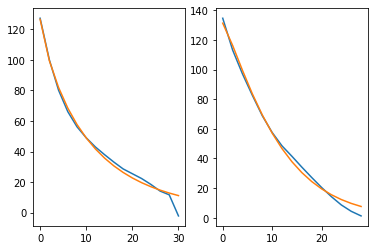

In [26]:
plt.subplot(121)
plt.plot(t,red)
plt.plot(t,fit_func(t,*p))
print('tau = ',1/p[1])

plt.subplot(122)
plt.plot(t2,red2)
plt.plot(t2,fit_func(t2,*p2))
print('tau2 = ',1/p2[1])
